In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import json
import os

In [2]:
train_language_types = ["en"]
train_language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]

# train_language_types = ["en", "bn", "fr", "kn", "ca", "vi", "mr", "it", "hr", "ar", "ne", "sk", "ro", "de"]

In [8]:

answers_matx = np.zeros((8, 15590))
train_language_array = np.zeros(15590)
avg_accuracy = np.zeros((8, len(train_language_types)))
for i in range(3):
    num_points = 0
    # checkpoint = ["00500", "01500", "02000", "02500", "05000", "10000", "20000", "30000"][i]
    checkpoint = ["02000", "05000", "10000"][i]

    model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_full_llama7B/checkpoint_{checkpoint}/hf_model"
    # for language in train_language_types:
    for j in range(len(train_language_types)):
        language = train_language_types[j]
        answers = np.load(os.path.join(model_path, f"{language}_trainpts_correct_all.npy"))
        answers_matx[i][num_points:num_points+len(answers)] = answers
        avg_accuracy[i][j] = np.mean(answers)
        train_language_array[num_points:num_points+len(answers)] = j
        num_points += (len(answers))

In [9]:
answers_matx[0]

array([0., 1., 1., ..., 1., 0., 0.])

In [5]:
hold_one_out_gt_likelihood = np.zeros(len(train_language_types))
model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_subsample1_llama7B/checkpoint_10000/hf_model"
for j in range(len(train_language_types)):
    language = train_language_types[j]
    A_to_D_probs_unnorm = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))

In [6]:
A_to_D_probs_unnorm[np.arange(len(answers)), answers]

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
train_idxs

array([9063, 8190, 1089, ...,  564, 8970, 7855])

In [7]:
hold_one_out_gt_likelihood = np.ones((2, 15590))*-1

train_idxs = np.load("sft_arc_train_idxs_random.npy")


def map_letters_to_numbers(letter):
    if letter == "2":
        return 1
    if letter == "1":
        return 0
    if letter == "3":
        return 2
    if letter == "4":
        return 3
    return ord(letter) - ord("A")


accuracies_multilingual = []
likelihoods_gt_multilingual = []
model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_subsample1_llama7B/checkpoint_10000/hf_model"

for language in train_language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))))
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))])

accuracies_multilingual = np.concatenate(accuracies_multilingual)[train_idxs]
likelihoods_gt_multilingual = np.concatenate(likelihoods_gt_multilingual)[train_idxs]

hold_one_out_gt_likelihood[0, len(accuracies_multilingual)//3:] = likelihoods_gt_multilingual[len(accuracies_multilingual)//3:]



accuracies_multilingual = []
likelihoods_gt_multilingual = []
model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_subsample2_llama7B/checkpoint_10000/hf_model"

for language in train_language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))))
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))])

accuracies_multilingual = np.concatenate(accuracies_multilingual)[train_idxs]
likelihoods_gt_multilingual = np.concatenate(likelihoods_gt_multilingual)[train_idxs]

hold_one_out_gt_likelihood[0, :len(accuracies_multilingual)//3] = likelihoods_gt_multilingual[:len(accuracies_multilingual)//3]
hold_one_out_gt_likelihood[1, 2*len(accuracies_multilingual)//3:] = likelihoods_gt_multilingual[2*len(accuracies_multilingual)//3:]


accuracies_multilingual = []
likelihoods_gt_multilingual = []
model_path = f"/data/katie_kang/trlx/examples/ckpts/sft_arc_subsample3_llama7B/checkpoint_10000/hf_model"

for language in train_language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))))
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))])

accuracies_multilingual = np.concatenate(accuracies_multilingual)[train_idxs]
likelihoods_gt_multilingual = np.concatenate(likelihoods_gt_multilingual)[train_idxs]

hold_one_out_gt_likelihood[1, :2*len(accuracies_multilingual)//3] = likelihoods_gt_multilingual[:2*len(accuracies_multilingual)//3]



In [ ]:
# convert back to original order




train_idxs = np.array([5, 2, 3, 4, 0, 1])
mixed = np.array([1, 2, 4, 8, 16, 32])[train_idxs]

orig_order = np.ones(5)*-1
orig_order[train_idxs] = mixed    
    

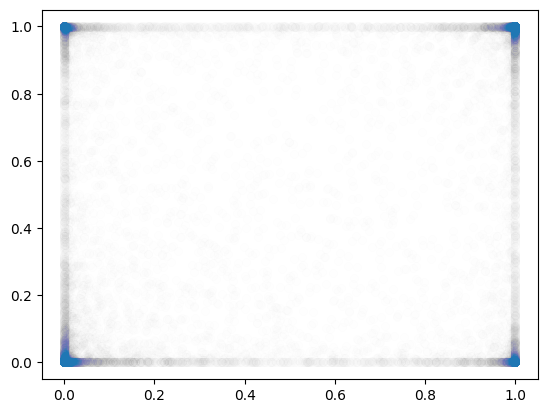

In [8]:
plt.scatter(hold_one_out_gt_likelihood[0], hold_one_out_gt_likelihood[1], alpha=0.005)

(array([[3.449e+03, 3.070e+02, 2.230e+02, 1.380e+02, 1.380e+02, 1.080e+02,
         9.300e+01, 1.180e+02, 1.380e+02, 1.340e+03],
        [2.800e+02, 5.200e+01, 4.500e+01, 3.200e+01, 1.700e+01, 2.100e+01,
         1.700e+01, 2.000e+01, 2.100e+01, 1.330e+02],
        [1.760e+02, 3.300e+01, 3.000e+01, 2.200e+01, 2.300e+01, 1.700e+01,
         1.100e+01, 1.900e+01, 9.000e+00, 1.090e+02],
        [1.450e+02, 2.100e+01, 2.700e+01, 2.700e+01, 1.500e+01, 1.200e+01,
         8.000e+00, 1.100e+01, 1.200e+01, 8.000e+01],
        [1.160e+02, 3.500e+01, 1.900e+01, 1.200e+01, 1.300e+01, 1.600e+01,
         1.200e+01, 3.000e+00, 1.200e+01, 7.800e+01],
        [1.070e+02, 1.400e+01, 1.500e+01, 1.800e+01, 9.000e+00, 1.500e+01,
         5.000e+00, 7.000e+00, 7.000e+00, 8.200e+01],
        [1.010e+02, 1.700e+01, 1.300e+01, 1.100e+01, 1.500e+01, 1.000e+01,
         1.000e+01, 1.300e+01, 1.300e+01, 8.500e+01],
        [1.180e+02, 2.000e+01, 1.400e+01, 1.300e+01, 1.300e+01, 9.000e+00,
         6.000e+00, 1.

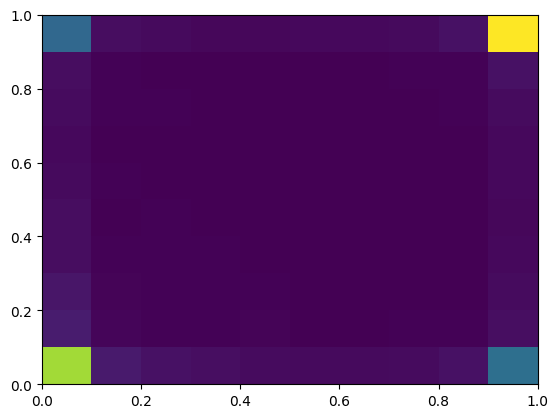

In [9]:
plt.hist2d(hold_one_out_gt_likelihood[0], hold_one_out_gt_likelihood[1])

In [11]:
((hold_one_out_gt_likelihood[0]>0.5)*(hold_one_out_gt_likelihood[1]>0.5)).sum()/len(hold_one_out_gt_likelihood[0])

0.3308531109685696

In [13]:
((hold_one_out_gt_likelihood[0]<0.5)*(hold_one_out_gt_likelihood[1]<0.5)).sum()/len(hold_one_out_gt_likelihood[0])

0.3460551635663887

In [22]:
((hold_one_out_gt_likelihood[0]>0.5)*(hold_one_out_gt_likelihood[1]<0.5)).sum()/len(hold_one_out_gt_likelihood[0])

0.1679923027581783

In [23]:
a = ((hold_one_out_gt_likelihood[0]>0.5)).sum()/len(hold_one_out_gt_likelihood[0])

In [24]:
b = ((hold_one_out_gt_likelihood[1]>0.5)).sum()/len(hold_one_out_gt_likelihood[0])

In [28]:
(a)*(1-b)

0.2564302210138652

In [ ]:
((hold_one_out_gt_likelihood[0]>0.5)*(hold_one_out_gt_likelihood[1]>0.5)).sum()/len(hold_one_out_gt_likelihood[0])

In [18]:
not_memorized = np.where(answers_matx[2][train_idxs]==1)
memorized = np.where(answers_matx[2][train_idxs]==0)

Text(0.5, 0, 'hold-n-out models pred ground truth likelihood')

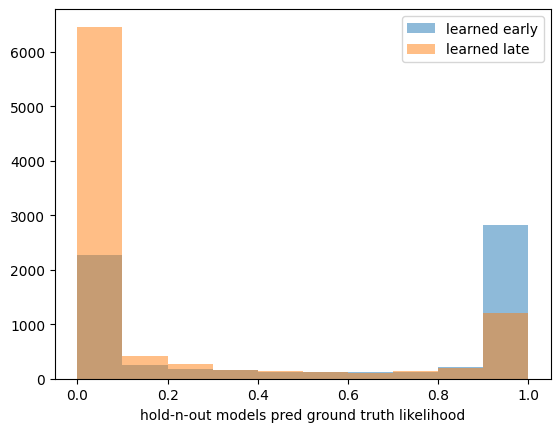

In [21]:
plt.hist(np.min(hold_one_out_gt_likelihood, axis=0)[not_memorized], alpha=0.5, label="learned early")
plt.hist(np.min(hold_one_out_gt_likelihood, axis=0)[memorized], alpha=0.5, label="learned late")

plt.legend()
plt.xlabel("hold-n-out models pred ground truth likelihood")

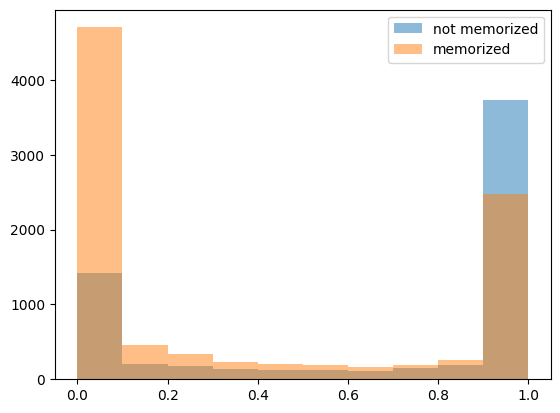

In [48]:
plt.hist(hold_one_out_gt_likelihood[1][not_memorized], alpha=0.5, label="not memorized")
plt.hist(hold_one_out_gt_likelihood[1][memorized], alpha=0.5, label="memorized")

plt.legend()

In [48]:
np.where(np.array([5, 5, 5, 5, 5])==5)[0]

array([0, 1, 2, 3, 4])

In [ ]:
()